In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline 

In [2]:
df = pd.read_csv('muse_v3.csv',engine='python')
df.isna().any()[lambda x: x]

mbid          True
spotify_id    True
genre         True
dtype: bool

In [3]:
df2 = df.dropna(subset=['spotify_id'])
df2.shape

(61630, 11)

In [4]:
df2['seeds'].describe
df3 = df2.groupby('seeds').count()
df3

,lastfm_url,track,artist,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,spotify_id,genre
seeds,,,,,,,,,,
"['acerbic', 'bittersweet']",1,1,1,1,1,1,1,1,1,1
"['acerbic', 'cerebral']",1,1,1,1,1,1,1,1,1,1
"['acerbic', 'driving', 'calm']",1,1,1,1,1,1,1,1,1,1
"['acerbic', 'ironic', 'witty']",1,1,1,1,1,1,1,1,1,1
"['acerbic', 'naive']",1,1,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
"['yearning', 'summery']",1,1,1,1,1,1,1,1,1,1
"['yearning', 'sweet']",1,1,1,1,1,1,1,1,1,1
"['yearning', 'tender']",1,1,1,1,1,1,1,0,1,1


In [5]:
mySentiments = set()
for row in df2['seeds']:
    str = row[1:-1]
    seed_list = str.split(", ")
    for word in seed_list:
        thing = word[1:-1]
        mySentiments.add(thing)
print(mySentiments)

{'snide', 'springlike', 'aggressive', 'druggy', 'sacred', 'naive', 'bravado', 'sprawling', 'ominous', 'sleazy', 'unsettling', 'sexy', 'transparent', 'stately', 'ecstatic', 'ambitious', 'reverent', 'trippy', 'intimate', 'intense', 'spicy', 'malevolent', 'menacing', 'airy', 'sugary', 'languid', 'technical', 'street-smart', 'gutsy', 'wintry', 'energetic', 'shimmering', 'ironic', 'suspenseful', 'dark', 'sprightly', 'graceful', 'raucous', 'cathartic', 'sexual', 'meandering', 'elaborate', 'powerful', 'eccentric', 'agreeable', 'fun', 'tragic', 'hungry', 'plaintive', 'sparkling', 'spooky', 'nocturnal', 'poignant', 'paranoid', 'introspective', 'self-conscious', 'angst-ridden', 'nostalgic', 'noble', 'knotty', 'uncompromising', 'soothing', 'organic', 'witty', 'dignified', 'exciting', 'complex', 'pure', 'hostile', 'explosive', 'child-like', 'lively', 'happy', 'earnest', 'pastoral', 'macabre', 'triumphant', 'consoling', 'relaxed', 'lush', 'greasy', 'lyrical', 'acerbic', 'spacey', 'fractured', 'mess

In [6]:
mySentiments_dict = dict.fromkeys(mySentiments, 0)
mySentiments_dict

{'snide': 0,
 'springlike': 0,
 'aggressive': 0,
 'druggy': 0,
 'sacred': 0,
 'naive': 0,
 'bravado': 0,
 'sprawling': 0,
 'ominous': 0,
 'sleazy': 0,
 'unsettling': 0,
 'sexy': 0,
 'transparent': 0,
 'stately': 0,
 'ecstatic': 0,
 'ambitious': 0,
 'reverent': 0,
 'trippy': 0,
 'intimate': 0,
 'intense': 0,
 'spicy': 0,
 'malevolent': 0,
 'menacing': 0,
 'airy': 0,
 'sugary': 0,
 'languid': 0,
 'technical': 0,
 'street-smart': 0,
 'gutsy': 0,
 'wintry': 0,
 'energetic': 0,
 'shimmering': 0,
 'ironic': 0,
 'suspenseful': 0,
 'dark': 0,
 'sprightly': 0,
 'graceful': 0,
 'raucous': 0,
 'cathartic': 0,
 'sexual': 0,
 'meandering': 0,
 'elaborate': 0,
 'powerful': 0,
 'eccentric': 0,
 'agreeable': 0,
 'fun': 0,
 'tragic': 0,
 'hungry': 0,
 'plaintive': 0,
 'sparkling': 0,
 'spooky': 0,
 'nocturnal': 0,
 'poignant': 0,
 'paranoid': 0,
 'introspective': 0,
 'self-conscious': 0,
 'angst-ridden': 0,
 'nostalgic': 0,
 'noble': 0,
 'knotty': 0,
 'uncompromising': 0,
 'soothing': 0,
 'organic': 0,

In [7]:
for row in df2['seeds']:
    str = row[1:-1]
    seed_list = str.split(", ")
    for word in seed_list:
        thing = word[1:-1]
        mySentiments_dict[thing] += 1

In [8]:
mySentiments_dict

{'snide': 14,
 'springlike': 11,
 'aggressive': 827,
 'druggy': 104,
 'sacred': 487,
 'naive': 105,
 'bravado': 26,
 'sprawling': 37,
 'ominous': 382,
 'sleazy': 766,
 'unsettling': 155,
 'sexy': 933,
 'transparent': 33,
 'stately': 18,
 'ecstatic': 103,
 'ambitious': 78,
 'reverent': 7,
 'trippy': 698,
 'intimate': 593,
 'intense': 887,
 'spicy': 84,
 'malevolent': 21,
 'menacing': 241,
 'airy': 108,
 'sugary': 20,
 'languid': 10,
 'technical': 509,
 'street-smart': 38,
 'gutsy': 26,
 'wintry': 49,
 'energetic': 890,
 'shimmering': 86,
 'ironic': 413,
 'suspenseful': 29,
 'dark': 926,
 'sprightly': 2,
 'graceful': 46,
 'raucous': 49,
 'cathartic': 254,
 'sexual': 418,
 'meandering': 23,
 'elaborate': 60,
 'powerful': 858,
 'eccentric': 500,
 'agreeable': 2,
 'fun': 936,
 'tragic': 351,
 'hungry': 23,
 'plaintive': 66,
 'sparkling': 85,
 'spooky': 721,
 'nocturnal': 558,
 'poignant': 607,
 'paranoid': 273,
 'introspective': 489,
 'self-conscious': 33,
 'angst-ridden': 24,
 'nostalgic':

In [9]:
import scipy.stats as ss

In [10]:
rankedValues = ss.rankdata(list(mySentiments_dict.values()), method = 'ordinal')
totalVal = len(rankedValues)
myValues = list(mySentiments_dict.values())
myKeys = list(mySentiments_dict.keys())
rankedValues = rankedValues - 1
sortedKeys = ["",]*totalVal
sortedVals = [0,]*totalVal
for i, rank in enumerate(rankedValues):
    sortedKeys[rank] = myKeys[i]
    sortedVals[rank] = myValues[i]


In [11]:
sortedKeys = sortedKeys[::-1]
sortedVals = sortedVals[::-1]

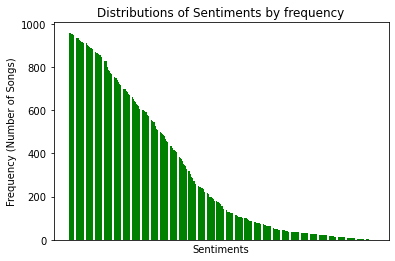

In [12]:
plt.bar(sortedKeys, sortedVals, color='g')
plt.title("Distributions of Sentiments by frequency")
plt.ylabel("Frequency (Number of Songs)")
plt.xlabel("Sentiments")
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
plt.show()

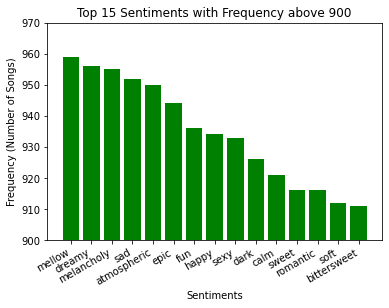

In [13]:
plt.bar(sortedKeys[:15], sortedVals[:15], color='g')
plt.ylim([900, 970])
ax= plt.subplot()
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.title("Top 15 Sentiments with Frequency above 900")
plt.xlabel("Sentiments")
plt.ylabel("Frequency (Number of Songs)")
plt.show()

Discussion Questions:

1) Because we plan on merging the sentiment dataset with data from Spotify's API, we sifted through the dataset and identified all columns with missing values. We determined that the only such column that affects our model is "spotify_id" (as that is the column on which we're going to merge another dataset), so we removed all rows that represent songs with no Spotify ID.

2) Next, we need to merge our updated dataset with data from Spotify's API. We also need to identify which columns are relevant to our project, and later standardize the object types and column names of the two datasets we intend to merge, especially the sentiment tags we'd like to label the data with. We will then divide the dataset into training and testing sections.

Discussion Question - Data Visualization


1. Our histogram is a data visualization of the number of times each sentiment appears in the data set. It is in increasing order. 
2. This data visualization is important for determining which mood tags we will use to categorize our sentiments. We want the reader to see that some sentiment tags are more relevant than others, so we can manipulate them accodingly. This visualization helps us understand at what frequency value constitutes a relevant mood tag.
3. We narrowed the number of sentiments that are represented in the histogram to only the top ten sentiments. This way, the audience gets a focused and readable view of the most frequent sentiments of the dataset. We then slanted the sentiment labels on the x-axis so the text does not run together. We also manipulated the scale of the y-axis to accentuate the differences in frequency between these sentiments, again for readibility purposes.
4. It's important to note that the mood tags are not necessarily organized or formulated concisely or in conjunction with one another. For instance, many of the sentiment tags in the raw dataset are rather repetitive (ex. "sexy" and "sexual" are two different labels). The description of each song is dependent on the author of the dataset, so the labels are similarly dependent.


Discussion Questions - Implementation, Testing, and Training

1. To evaluate the performance of our implementation, we will be using the tools provided by Scikit-learn, like precision_score, accuracy-score, and confusion matrices. These will help us determine how well our model labelled the Spotify songs with matching sentiments.

2. We are taking this approach because it's a convenient and intuitive way to track the successes and failures of our model. These procedures will also give feedback quickly so we can adapt our model in a reasonable time frame.